In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/organelles.csv')

In [ ]:
data.tail()

,Organism Name,Organism Groups,Size(Mb),GC%,Type,Replicons,CDS,Release Date,Genes,Pseudogene
29377,Zygosaccharomyces mellis Y-12628,Eukaryota;Fungi;Ascomycetes,0.024335,20.3123,mitochondrion,NC_036374.1/KU920675.1,14,2017-12-18T00:00:00Z,40,0
29378,Zygosaccharomyces parabailii ATCC 60483,Eukaryota;Fungi;Ascomycetes,0.029945,26.6088,mitochondrion,MT:CP019506.1,13,2017-02-03T00:00:00Z,35,0
29379,Zygotorulaspora mrakii NRRL Y-6702,Eukaryota;Fungi;Ascomycetes,0.037644,18.8184,mitochondrion,MT:NW_023500906.1/CP058612.1,0,2020-10-28T00:00:00Z,0,0
29380,Zymoseptoria tritici,Eukaryota;Fungi;Ascomycetes,0.043964,31.9352,mitochondrion,NC_010222.1/EU090238.1,22,2008-01-03T00:00:00Z,43,0
29381,Zyzomys argurus,Eukaryota;Animals;Mammals,0.016261,33.6388,mitochondrion,NC_057636.1/MT741674.1,13,2021-09-09T00:00:00Z,37,0


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(data.columns)
print(data.shape)

Index(['Organism Name', 'Organism Groups', 'Size(Mb)', 'GC%', 'Type',
       'Replicons', 'CDS', 'Release Date', 'Genes', 'Pseudogene'],
      dtype='object')
(29382, 10)


I little bit of ML I learn during my coursework

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[['Genes','Pseudogene']]
y = data['Size(Mb)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 0.04292136140676569


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.6283765813969593


really awerage results, lats see what our Mean Squared Error tells us

In [ ]:
size_range = data['Size(Mb)'].describe()
a = size_range['max']
b = size_range['min']
print(f'size_range max:{a}, size_range min:{b}')


size_range max:41.196, size_range min:0.001136


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    # Add more parameters as needed
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04292136140676569




---



THIS were actually the first part I have been doing for these dataset  to get more info about spicies and their DNA


In [ ]:
data.describe(include = object).T

,count,unique,top,freq
Organism Name,29382,28208,Plasmodium falciparum,27
Organism Groups,29382,19,Eukaryota;Plants;Land Plants,11924
Type,29382,7,mitochondrion,17196
Replicons,29382,29377,MT:NC_044858.1/,2
Release Date,29382,1790,2022-11-12T00:00:00Z,772


In [ ]:
print(data.dtypes.value_counts()) #counting types of objects in the dataset

object     5
int64      3
float64    2
Name: count, dtype: int64


In [ ]:
import numpy as np
data.describe(include = np.int64).T

,count,mean,std,min,25%,50%,75%,max
CDS,29382.0,43.686849,67.529996,0.0,13.0,13.0,84.0,9230.0
Genes,29382.0,71.580253,77.014098,0.0,37.0,37.0,130.0,9230.0
Pseudogene,29382.0,0.491559,2.635662,0.0,0.0,0.0,0.0,94.0


In [ ]:
copy = data.set_index(['Organism Name'], drop = False)
copy.head(3)

,Organism Name,Organism Groups,Size(Mb),GC%,Type,Replicons,CDS,Release Date,Genes,Pseudogene
Organism Name,,,,,,,,,,
Aacanthocnema dobsoni,Aacanthocnema dobsoni,Eukaryota;Animals;Insects,0.015179,21.9382,mitochondrion,NC_038132.1/MG989216.1,13,2018-07-31T00:00:00Z,37,0
Abacion magnum,Abacion magnum,Eukaryota;Animals;Other Animals,0.015160,33.4037,mitochondrion,NC_021932.1/JX437062.1,13,2013-08-06T00:00:00Z,35,0
Abalistes stellaris,Abalistes stellaris,Eukaryota;Animals;Fishes,0.016502,44.4189,mitochondrion,NC_011943.1/AP009202.1,13,2009-01-22T00:00:00Z,13,0


In [ ]:
copy = data.set_index(['Organism Name'])
copy_ofcopy = copy.reset_index()
print(copy_ofcopy.head(3)) #the reverse action to restore the index

           Organism Name                  Organism Groups  Size(Mb)      GC%  \
0  Aacanthocnema dobsoni        Eukaryota;Animals;Insects  0.015179  21.9382   
1         Abacion magnum  Eukaryota;Animals;Other Animals  0.015160  33.4037   
2    Abalistes stellaris         Eukaryota;Animals;Fishes  0.016502  44.4189   

            Type               Replicons  CDS          Release Date  Genes  \
0  mitochondrion  NC_038132.1/MG989216.1   13  2018-07-31T00:00:00Z     37   
1  mitochondrion  NC_021932.1/JX437062.1   13  2013-08-06T00:00:00Z     35   
2  mitochondrion  NC_011943.1/AP009202.1   13  2009-01-22T00:00:00Z     13   

   Pseudogene  
0           0  
1           0  
2           0  


In [ ]:
organelle = data['Type']
organelle

0        mitochondrion
1        mitochondrion
2        mitochondrion
3        mitochondrion
4        mitochondrion
             ...      
29377    mitochondrion
29378    mitochondrion
29379    mitochondrion
29380    mitochondrion
29381    mitochondrion
Name: Type, Length: 29382, dtype: object

In [ ]:
print(organelle.unique()) #genom type

['mitochondrion' 'chloroplast' 'plastid' 'apicoplast' 'kinetoplast'
 'cyanelle' 'chromatophore']


In [ ]:
organelle.value_counts()

Type
mitochondrion    17196
chloroplast      10692
plastid           1415
apicoplast          71
kinetoplast          5
chromatophore        2
cyanelle             1
Name: count, dtype: int64

In [ ]:
plastids = data[data['Type'].isin(['chloroplast','plastid'])]  # we are intrested in chloroplasts and plastids
print(plastids.describe())

           Size(Mb)           GC%           CDS         Genes    Pseudogene
count  12107.000000  12107.000000  12107.000000  12107.000000  12107.000000
mean       0.152783     37.020776     85.381019    130.140745      1.124308
std        0.025315      2.304723     21.231842     23.856301      3.865810
min        0.004343     12.684600      0.000000      0.000000      0.000000
25%        0.151010     36.569950     83.000000    129.000000      0.000000
50%        0.155276     37.359200     85.000000    131.000000      0.000000
75%        0.159454     38.004650     87.000000    133.000000      1.000000
max        1.352310     57.664000    863.000000    912.000000     94.000000


In [ ]:
plastids_stat = plastids.describe()
print(f'Type returned by isin()    : {type(plastids)}')
print(f'Type returned by describe(): {type(plastids_stat)}')

Type returned by isin()    : <class 'pandas.core.frame.DataFrame'>
Type returned by describe(): <class 'pandas.core.frame.DataFrame'>


In [ ]:
print(f"Average lenth of the genom(Mb):            \
{round(plastids_stat.loc['mean','Size(Mb)'], 2)}")
print(f"Minimal value of genom lenth (Mb): \
{round(plastids_stat.loc['min','Size(Mb)'], 5)}")
print(f"The max amount of genes:        \
{plastids_stat.loc['max','Genes']}")

Average lenth of the genom(Mb):            0.15
Minimal value of genom lenth (Mb): 0.00434
The max amount of genes:        912.0


In [ ]:
organisms = data['Organism Name']
organisms.value_counts().head(10)

Organism Name
Plasmodium falciparum     27
Homo sapiens              26
Mus musculus              12
Malus domestica           11
Arabidopsis thaliana      10
Solanum lycopersicum       8
Enteromyxum leei           8
Glycine max                7
Canis lupus familiaris     6
Clathrina clathrus         6
Name: count, dtype: int64

In [ ]:
#that's how we access the particular name of the organism(our species latin name = clue)
#in dataset
plasmodium = data[data['Organism Name'] =='Plasmodium falciparum']

In [ ]:
plasmodium['Type'].value_counts()

Type
mitochondrion    14
apicoplast       13
Name: count, dtype: int64

In [ ]:
poa = data[data['Organism Name'].str.contains('Poa')] #corn

In [ ]:
poa[['Organism Name', 'Type']]

,Organism Name,Type
21330,Poa alsodes,chloroplast
21331,Poa annua,plastid
21332,Poa diaphora,plastid
21333,Poa interior,plastid
21334,Poa nemoralis,plastid
21335,Poa palustris,plastid
21336,Poa pratensis,chloroplast
21337,Poa saltuensis,chloroplast
21338,Poa supina,chloroplast
21339,Poa trivialis,plastid


In [ ]:
data['Type'] = data['Organism Name'].str.split(' ').str[0]
data[['Organism Name', 'Type']].sort_values(by=['Type'],ascending=False)

,Organism Name,Type
28045,triploid Megalobrama amblycephala x Xenocypris...,triploid
17436,natural gynogenetic Carassius auratus red var.,natural
8524,diploid Megalobrama amblycephala x Xenocypris ...,diploid
8525,diploid Xenocypris davidi x Megalobrama amblyc...,diploid
21505,[Polygonum] chinense var. procumbens,[Polygonum]
...,...,...
4,Abax parallelepipedus,Abax
3,Abaria herringbona,Abaria
2,Abalistes stellaris,Abalistes
1,Abacion magnum,Abacion


Data visualisation

In [ ]:
data['Groups'] = data['Organism Groups'].str.split(';').str[1]
data['Type'] = ['plastid' if row == 'chloroplast' else row for row in data['Type']]

In [ ]:
print(data['Type'].unique())

groups = data.groupby(['Type', 'Groups'])

['mitochondrion' 'plastid' 'apicoplast' 'kinetoplast' 'cyanelle'
 'chromatophore']


In [ ]:
mean_size = groups[['Size(Mb)', 'Genes']].mean()

In [ ]:
mit_mean_size = mean_size.loc['mitochondrion']\
                            .loc[['Animals','Fungi','Plants']]
print(mit_mean_size)

         Size(Mb)      Genes
Groups                      
Animals  0.016399  27.655382
Fungi    0.064969  31.769726
Plants   0.348389  63.793624


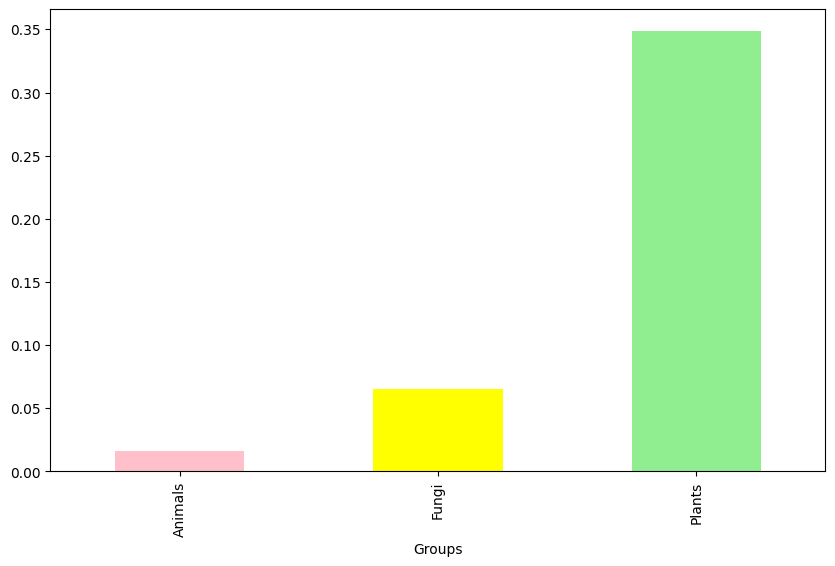

In [ ]:
import matplotlib.pyplot as plt
mit_mean_size.plot(kind='bar', y='Size(Mb)', figsize=(10, 6), color=['pink','yellow', 'lightgreen'], legend =False)
plt.show()

We want to know something aboy standart deviation of these data

In [ ]:
size_sd = groups[['Size(Mb)', 'Genes']].std()
mit_mean_size_sd = size_sd.loc['mitochondrion']\
                            .loc[['Animals','Fungi','Plants']]

In [ ]:
mit_mean_size_sd

,Size(Mb),Genes
Groups,,
Animals,0.001770,12.927821
Fungi,0.040008,29.191967
Plants,0.294375,97.694530


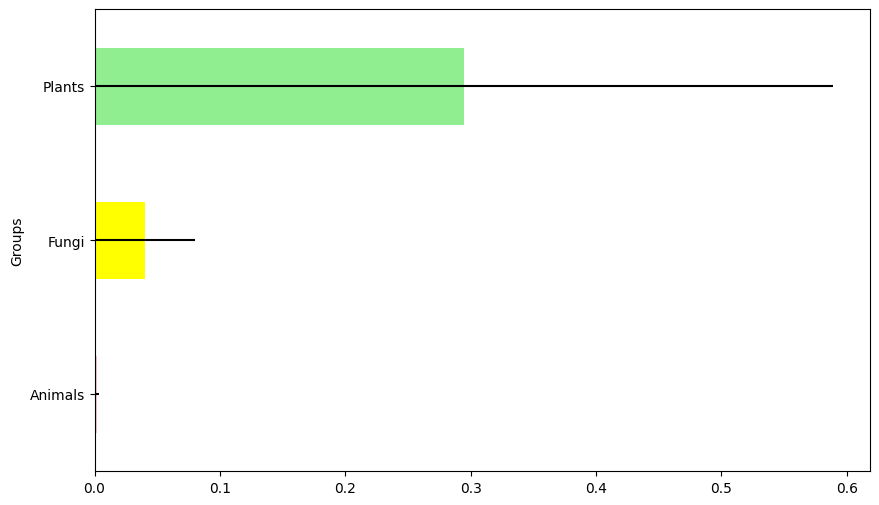

In [ ]:
mit_mean_size_sd.plot(kind='barh', y='Size(Mb)',
                      xerr = mit_mean_size_sd['Size(Mb)'],
                      figsize = (10, 6), color=['pink','yellow','lightgreen'],
                      legend = False)
plt.show()
#we can also use kind = 'bar' with yerr

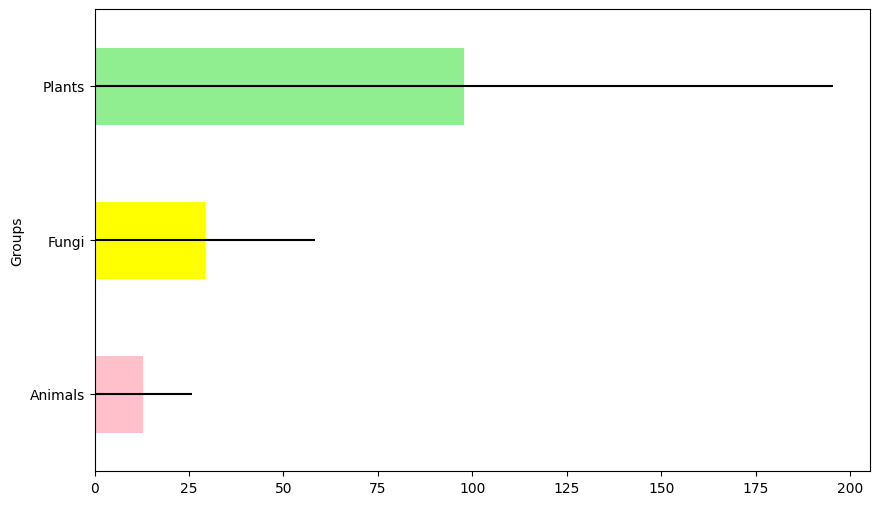

In [ ]:
mit_mean_size_sd.plot(kind='barh', y='Genes',
                      xerr = mit_mean_size_sd['Genes'],
                      figsize=(10, 6), color=['pink','yellow', 'lightgreen'],
                      legend =False)
plt.show()

In [ ]:
plant_mit = data[(data['Type'] == 'mitochondrion')
                             & (data['Groups'] == 'Plants')]

<Axes: ylabel='Frequency'>

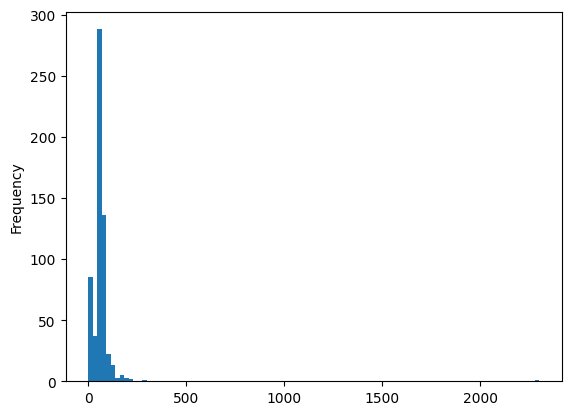

In [ ]:
plant_mit['Genes'].plot.hist(bins=100)

In [ ]:
plant_mit_too_much_gen = data[(data['Type'] == 'mitochondrion')
                             & (data['Groups'] == 'Plants')
                             & (data['Genes'] >500)]

In [ ]:
plant_mit_too_much_gen[['Organism Name', 'Genes','Replicons' ]]

,Organism Name,Genes,Replicons
28505,Utricularia reniformis,2299,NC_034982.1/KY774314.1


In [ ]:
plant_mit_else = data[(data['Type'] == 'mitochondrion')
                             & (data['Groups'] == 'Plants')
                             & (data['Genes'] <=500)]
print(plant_mit_else[['Organism Name', 'Genes','Replicons' ]])

                      Organism Name  Genes               Replicons
34                    Abies koreana     60  NC_071216.1/ON897690.1
70                  Acacia ligulata     63            NC_040998.1/
215                 Acer yangbiense     67           MT:CM017774.1
217                 Acer yangbiense     67            NC_059858.1/
324            Aconitum kusnezoffii     69  NC_053920.1/MW013323.1
...                             ...    ...                     ...
29323               Ziziphus jujuba     58  NC_029809.1/KU187967.1
29325  Ziziphus jujuba var. spinosa     42           MT:CM036902.1
29328           Ziziphus mauritiana     54  NC_068745.1/OP537228.1
29351                Zostera marina     38  NC_035345.1/KX808392.1
29371          Zygodon viridissimus     67  NC_031846.1/KX711975.1

[595 rows x 3 columns]


In [ ]:
plant_mit_ofchoice = data[(data['Type'] == 'mitochondrion')
                             & (data['Groups'] == 'Plants')
                             & (data['Genes'] <=500)
                             & (data['Genes'] >10)]
print(plant_mit_ofchoice[['Organism Name', 'Genes','Replicons' ]])

                      Organism Name  Genes               Replicons
34                    Abies koreana     60  NC_071216.1/ON897690.1
70                  Acacia ligulata     63            NC_040998.1/
215                 Acer yangbiense     67           MT:CM017774.1
217                 Acer yangbiense     67            NC_059858.1/
324            Aconitum kusnezoffii     69  NC_053920.1/MW013323.1
...                             ...    ...                     ...
29323               Ziziphus jujuba     58  NC_029809.1/KU187967.1
29325  Ziziphus jujuba var. spinosa     42           MT:CM036902.1
29328           Ziziphus mauritiana     54  NC_068745.1/OP537228.1
29351                Zostera marina     38  NC_035345.1/KX808392.1
29371          Zygodon viridissimus     67  NC_031846.1/KX711975.1

[525 rows x 3 columns]


<Axes: ylabel='Frequency'>

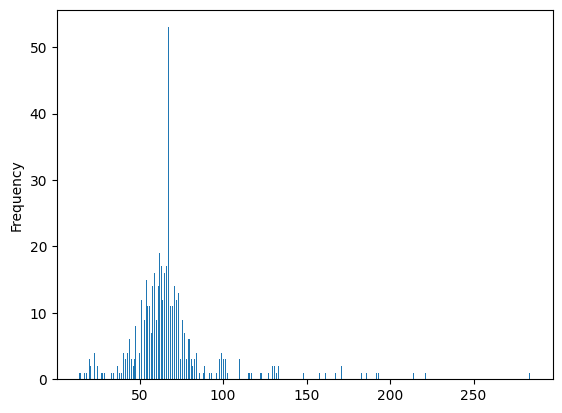

In [ ]:
plant_mit_ofchoice['Genes'].plot.hist(bins = 500)

<Axes: ylabel='Frequency'>

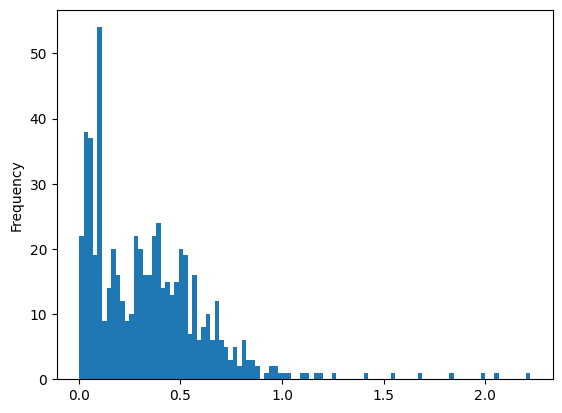

In [ ]:
plant_mit['Size(Mb)'].plot.hist(bins = 100)

<Axes: xlabel='Groups'>

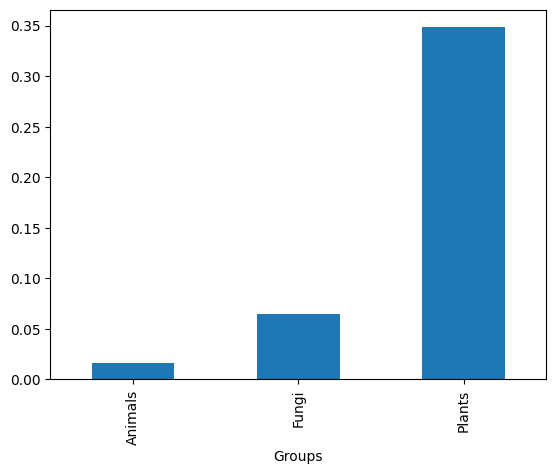

In [ ]:
mit_mean_size.plot(kind = 'bar', y = 'Size(Mb)', label = False)

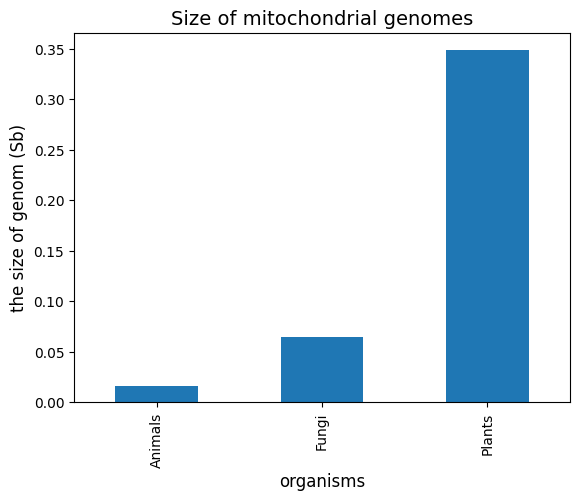

In [ ]:
from matplotlib import pyplot as plt
mit_mean_size.plot.bar(y = 'Size(Mb)', legend = False)
plt.title('Size of mitochondrial genomes', fontsize=14)
# Opis osi x
plt.xlabel('organisms',fontsize=12)
# Opis osi y
plt.ylabel('the size of genom (Sb)',fontsize=12)
# Opisy słupków
plt.xticks([0, 1, 2],['Animals', 'Fungi', 'Plants'])
# Zapis pliku
plt.savefig('size_of_mit.pdf', bbox_inches='tight')

In [ ]:
data = pd.read_csv('organelles.csv', parse_dates = ['Release Date'])
data['Groups'] = data['Organism Groups'].str.split(';').str[1]
data['Type'] = ['plastid' if row == 'chloroplast' else row for row in data['Type']]

Groups
Animals    0.016399
Fungi      0.064969
Plants     0.348389
Name: Size(Mb), dtype: float64


([<matplotlib.axis.XTick at 0x7a0c08f05e40>,
 [Text(0, 0, 'Animals'), Text(1, 0, 'Fungi'), Text(2, 0, 'Plants')])

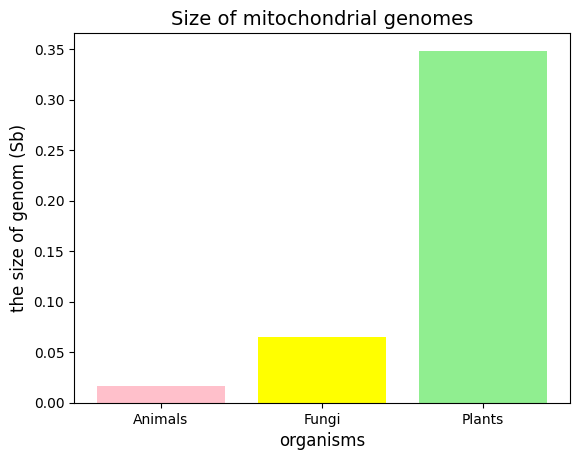

In [ ]:
mean_size = groups['Size(Mb)'].mean()
# Selekcja danych dla mitochondriów i grup organizmów:
mit_mean_size = mean_size.loc['mitochondrion']\
                            .loc[['Animals','Fungi','Plants']]
print(mit_mean_size)
plt.bar(mit_mean_size.index,
        mit_mean_size,
        color = ['pink', 'yellow', 'lightgreen'])
plt.title('Size of mitochondrial genomes', fontsize=14)
# Opis osi x
plt.xlabel('organisms',fontsize=12)
# Opis osi y
plt.ylabel('the size of genom (Sb)',fontsize=12)
# Opisy słupków
plt.xticks([0, 1, 2],['Animals', 'Fungi', 'Plants'])

In [ ]:
data['Year'] = data['Release Date'].dt.year
print(data['Year'].unique())

[2018 2013 2009 2023 2016 2020 2015 2014 2019 2017 2021 2022 2011 2008
 2004 2007 1994 2006 2012 2010 2003 2005 2002 1999 1996 2001 2000 1998
 1997 1995 1993 1986 1989 1990]


In [ ]:
years = data.groupby(['Type','Year'])
years_count = years.count()
print(years_count.loc['mitochondrion']['Size(Mb)'])

Year
1990       3
1993       2
1994       2
1995       1
1996       1
1997       1
1998       3
1999      91
2000      45
2001     102
2002      84
2003      86
2004     177
2005     122
2006     271
2007     195
2008     307
2009     415
2010     274
2011     393
2012     509
2013     871
2014     998
2015    1168
2016    1085
2017    1122
2018    1008
2019    1004
2020    1207
2021    1593
2022    3222
2023     834
Name: Size(Mb), dtype: int64


Text(0, 0.5, 'Amount of published genomes')

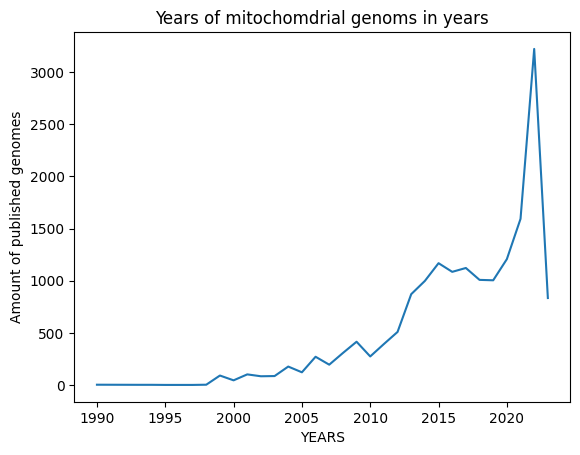

In [ ]:
plt.plot(years_count.loc['mitochondrion']['Size(Mb)'])
plt.title('Years of mitochomdrial genoms in years', fontsize = 12)
plt.xlabel('YEARS', fontsize = 10)
plt.ylabel('Amount of published genomes')

In [ ]:
years = data.groupby(['Groups', 'Type','Year'])
years_count = years.count()['Size(Mb)']
print(years_count)

Groups    Type           Year
Animals   mitochondrion  1998     2
                         1999    85
                         2000    32
                         2001    93
                         2002    77
                                 ..
Protists  plastid        2019    16
                         2020     2
                         2021     4
                         2022    19
                         2023     8
Name: Size(Mb), Length: 222, dtype: int64


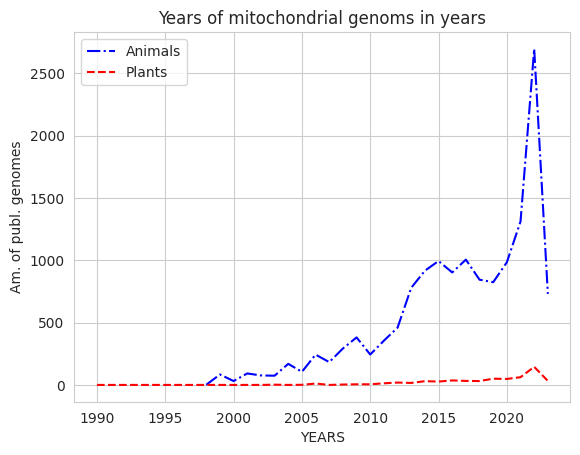

In [ ]:
plt.plot(years_count.loc['Animals'].loc['mitochondrion'],
         '-.b',
         label = 'Animals')
plt.plot(years_count.loc['Plants'].loc['mitochondrion'],
         '--r',
         label = 'Plants')
plt.title('Years of mitochondrial genoms in years', fontsize = 12)
plt.xlabel('YEARS', fontsize = 10)
plt.ylabel('Am. of publ. genomes')
plt.legend()

In [ ]:
organels = data.groupby(['Type','Groups'])
am_organels = organels.count()['Size(Mb)']
print(am_organels)

Type           Groups  
apicoplast     Protists       71
chromatophore  Protists        2
cyanelle       Protists        1
kinetoplast    Protists        5
mitochondrion  Animals     14799
               Fungi        1242
               Other         270
               Plants        596
               Protists      289
plastid        Other         317
               Plants      11681
               Protists      109
Name: Size(Mb), dtype: int64


Text(0.5, 1.0, 'Amount of mitochondrial genes in each group of organisms')

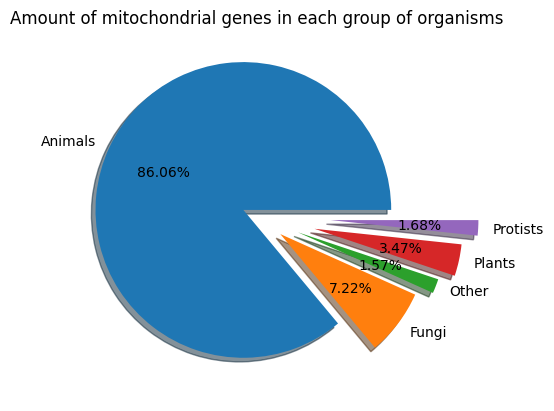

In [ ]:
plt.pie(am_organels.loc['mitochondrion'],
        labels = am_organels.loc['mitochondrion'].index,
        autopct = '%1.2f%%',
       shadow = True,
       explode = (0.1, 0.2, 0.3, 0.4, 0.5))
plt.title('Amount of mitochondrial genes in each group of organisms')

<ipython-input-110-4634abb3ff46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= mit_mean_size.index,


([<matplotlib.axis.XTick at 0x7a0c08b1e2f0>,
 [Text(0, 0, 'Animals'), Text(1, 0, 'Fungi'), Text(2, 0, 'Plants')])

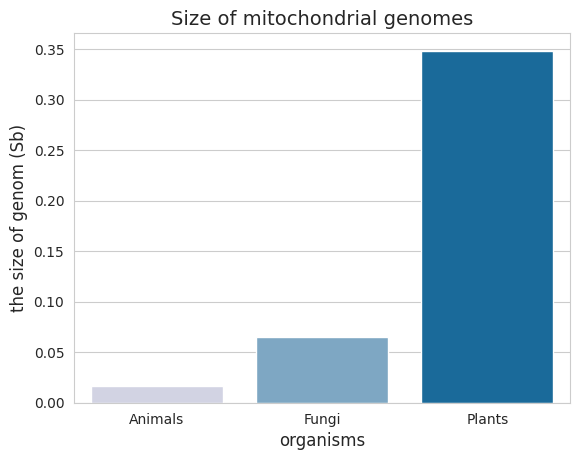

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.barplot(x= mit_mean_size.index,
            y = mit_mean_size,
            palette = 'PuBu')
plt.title('Size of mitochondrial genomes', fontsize=14)
plt.xlabel('organisms',fontsize=12)
plt.ylabel('the size of genom (Sb)',fontsize=12)
plt.xticks([0, 1, 2],['Animals', 'Fungi', 'Plants'])

In [ ]:
mito = data[ (data['Groups'].isin(['Animals','Fungi','Plants']))
           & (data['Type'] == 'mitochondrion')
           & (data['Genes'] <= 500)
           & (data['Genes'] > 10)
           ]
print(mito['Genes'])

0        37
1        35
2        13
3        37
4        37
         ..
29372    37
29377    40
29378    35
29380    43
29381    37
Name: Genes, Length: 15156, dtype: int64


<ipython-input-113-1421a5f7a0a8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = mito,


<Axes: xlabel='Groups', ylabel='Size(Mb)'>

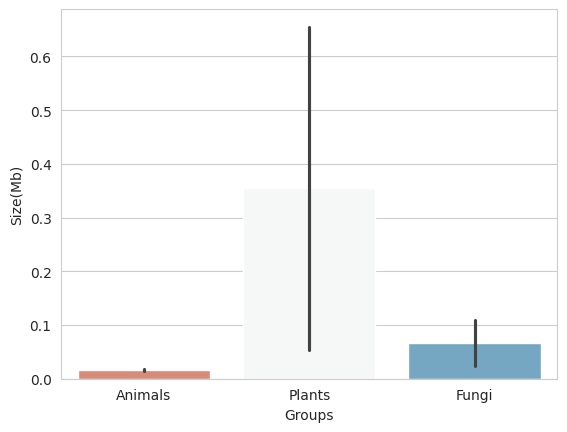

In [ ]:
sns.barplot(data = mito,
            x = 'Groups',
            y = 'Size(Mb)',
            palette = 'RdBu',
            errorbar ='sd')

<ipython-input-114-5432ccc5525d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = mito,


<Axes: xlabel='Groups', ylabel='Size(Mb)'>

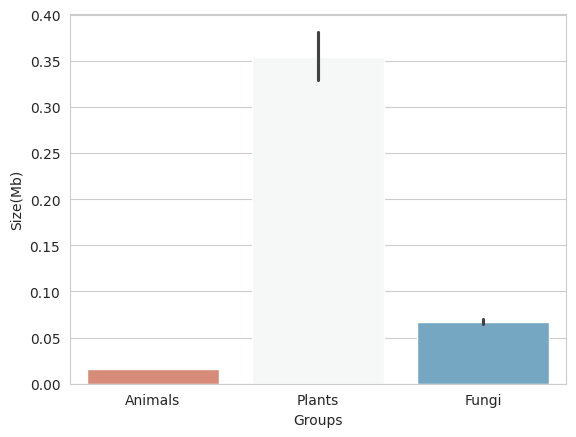

In [ ]:
sns.barplot(data = mito,
            x = 'Groups',
            y = 'Size(Mb)',
            palette = 'RdBu')

<ipython-input-115-55d49e537e42>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = mito,


<Axes: xlabel='Groups', ylabel='Size(Mb)'>

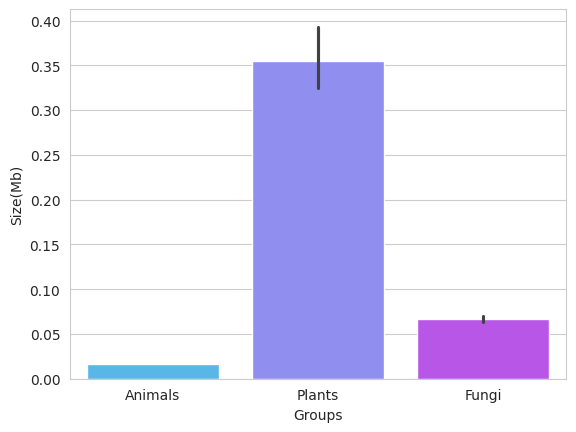

In [ ]:
sns.barplot(data = mito,
            x = 'Groups',
            y = 'Size(Mb)',
            palette = 'cool',
            errorbar = ('ci', 99)) #we are deciding about our p-value

<ipython-input-118-967c9b2ebd06>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = mito,


<Axes: xlabel='Groups', ylabel='Size(Mb)'>

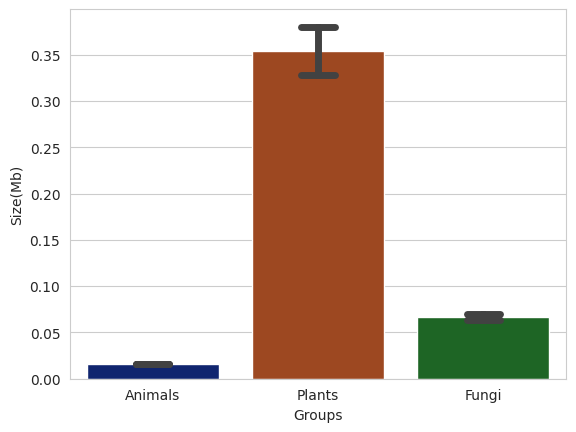

In [ ]:
sns.barplot(data = mito,
            x = 'Groups',
            y = 'Size(Mb)',
            capsize = 0.2,
            err_kws={'linewidth': 5},
            palette = 'dark')

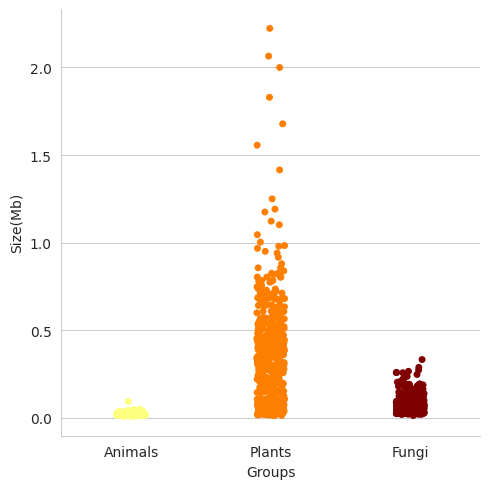

In [ ]:
sns.catplot(data = mito,
            x = 'Groups',
            y = 'Size(Mb)',
            palette = 'afmhot_r',
          hue = 'Groups')

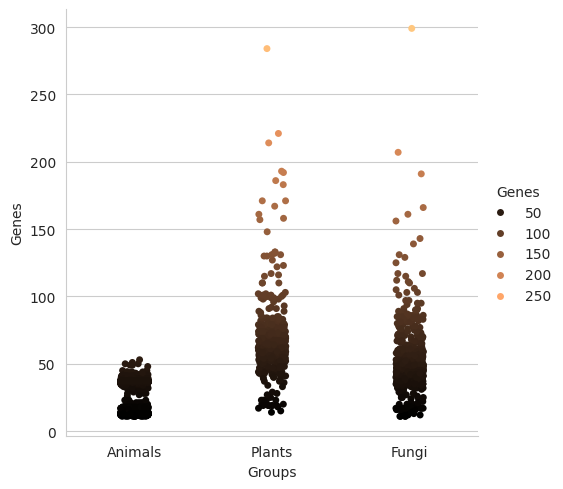

In [ ]:
sns.catplot(data = mito,
            x = 'Groups',
            y = 'Genes',
            palette = 'copper',
            hue = 'Genes'
	    )

<ipython-input-128-c7946f049abc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = mito,
<ipython-input-128-c7946f049abc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = mito,


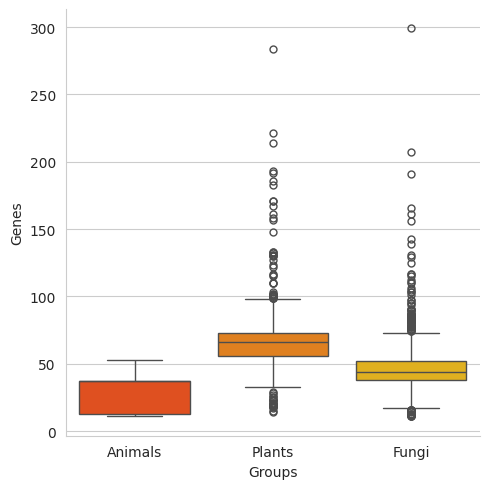

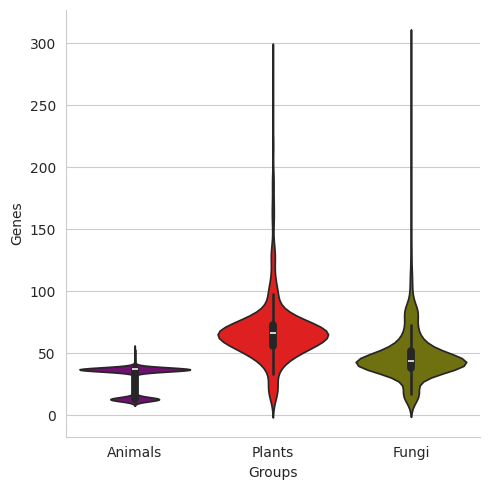

In [ ]:
sns.catplot(data = mito,
            x = 'Groups',
            y = 'Genes',
            kind = 'box',
            palette = 'autumn')
sns.catplot(data = mito,
            x = 'Groups',
            y = 'Genes',
            kind = 'violin',
            palette = 'brg')